forward backward asymmetry

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist
import mplhep as hep
import scipy.stats as stats
from scipy.stats import chisquare
import scipy
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

In [3]:
f=uproot.open("/home/submit/chowb/fccee/FCCAnalyzer/tmp/output_xsec_example.root")

In [4]:
f.keys()

['p8_ee_Zmumu_ecm91;1',
 'p8_ee_Zmumu_ecm91/gen_muons_p;1',
 'p8_ee_Zmumu_ecm91/gen_muons_theta;1',
 'p8_ee_Zmumu_ecm91/gen_muons_phi;1',
 'p8_ee_Zmumu_ecm91/gen_muons_no;1',
 'p8_ee_Zmumu_ecm91/evts_initial;1',
 'p8_ee_Zmumu_ecm91/leps_all_p;1',
 'p8_ee_Zmumu_ecm91/leps_all_theta;1',
 'p8_ee_Zmumu_ecm91/leps_all_phi;1',
 'p8_ee_Zmumu_ecm91/leps_all_q;1',
 'p8_ee_Zmumu_ecm91/leps_all_no;1',
 'p8_ee_Zmumu_ecm91/m_inv;1',
 'p8_ee_Zmumu_ecm91/emiss;1',
 'p8_ee_Zmumu_ecm91/acolinearity;1',
 'p8_ee_Zmumu_ecm91/max_p;1',
 'p8_ee_Zmumu_ecm91/visibleEnergy;1',
 'p8_ee_Zmumu_ecm91/theta_plus;1',
 'p8_ee_Zmumu_ecm91/theta_minus;1',
 'p8_ee_Zmumu_ecm91/cos_theta_plus;1',
 'p8_ee_Zmumu_ecm91/cos_theta_minus;1',
 'p8_ee_Zmumu_ecm91/cosThetac;1',
 'p8_ee_Zmumu_ecm91/evts_final;1',
 'p8_ee_Zmumu_ecm91/meta;1',
 'p8_ee_Ztautau_ecm91;1',
 'p8_ee_Ztautau_ecm91/gen_muons_p;1',
 'p8_ee_Ztautau_ecm91/gen_muons_theta;1',
 'p8_ee_Ztautau_ecm91/gen_muons_phi;1',
 'p8_ee_Ztautau_ecm91/gen_muons_no;1',
 'p8_ee_

198591928587.80002


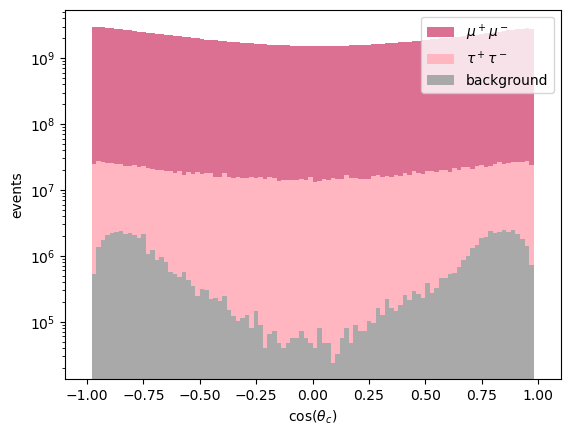

In [5]:
theta_mumu = f['p8_ee_Zmumu_ecm91/cosThetac;1']
y1,x = theta_mumu.to_numpy()
theta_tautau = f['p8_ee_Ztautau_ecm91/cosThetac;1']
theta_gaga = f['wzp6_gaga_mumu_5_ecm91p2/cosThetac;1']

hep.histplot([theta_mumu, theta_tautau, theta_gaga], label = ["$μ^+μ^-$", "$τ^+τ^-$", "background"], color = ['palevioletred', 'lightpink', 'darkgrey'], histtype = 'fill')

plt.legend()
plt.yscale("log")
plt.xlabel("$\cos(\\theta_c)$")
plt.ylabel("events")

a_fb = np.sum(y1, initial = -1)
print(a_fb)

In [6]:
h_mumu = f['p8_ee_Zmumu_ecm91/cosThetac'].to_hist()

xsec_f = h_mumu[0.0j:1.0j].sum()
xsec_b = h_mumu[-1.0j:0.0j].sum()
print(xsec_f)
print(xsec_b)

a_fb = (xsec_f.value-xsec_b.value)/(xsec_f.value+xsec_b.value)
print(a_fb)

variance = (4 * xsec_b.value * xsec_f.value)/((xsec_f.value + xsec_b.value)**3)

uncertainty = np.sqrt(variance)
print(uncertainty)

rel_uncertainty = uncertainty/a_fb
print(rel_uncertainty)

WeightedSum(value=9.69594e+10, variance=2.12644e+15)
WeightedSum(value=1.01633e+11, variance=2.22892e+15)
-0.023531610040789724
2.2433597708660606e-06
-9.53338835284716e-05


[2.98069132e+09 3.01251349e+09 2.95347470e+09 2.90827450e+09
 2.83625244e+09 2.79368398e+09 2.74637838e+09 2.67545288e+09
 2.63327918e+09 2.57628000e+09 2.52741728e+09 2.48489268e+09
 2.43363947e+09 2.37911851e+09 2.33398410e+09 2.28852072e+09
 2.25248776e+09 2.20763845e+09 2.17395213e+09 2.13090119e+09
 2.09184172e+09 2.05631317e+09 2.00637583e+09 1.98477360e+09
 1.95722801e+09 1.91422093e+09 1.89051330e+09 1.86564332e+09
 1.83763718e+09 1.81009159e+09 1.77741410e+09 1.76888287e+09
 1.73403419e+09 1.71594095e+09 1.68887785e+09 1.67269262e+09
 1.65598105e+09 1.64426979e+09 1.62018933e+09 1.60602178e+09
 1.57838846e+09 1.59086732e+09 1.56884839e+09 1.56792728e+09
 1.55029460e+09 1.53840789e+09 1.53799119e+09 1.54643471e+09
 1.52562200e+09 1.53779381e+09 1.53825437e+09 1.53257419e+09
 1.53285929e+09 1.53174080e+09 1.54625926e+09 1.54472407e+09
 1.54946121e+09 1.56402353e+09 1.57319077e+09 1.58051579e+09
 1.58887158e+09 1.60404797e+09 1.62299652e+09 1.64207667e+09
 1.63567276e+09 1.668679

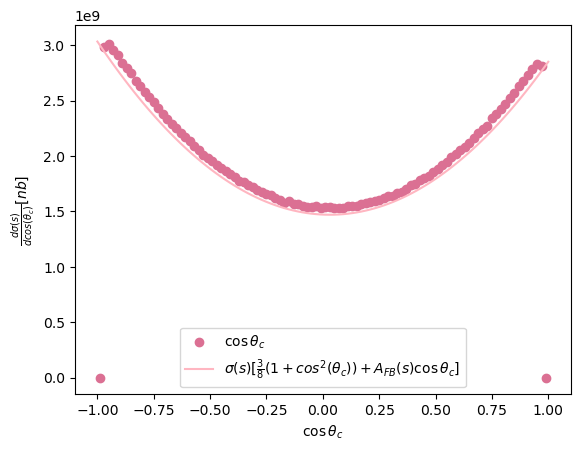

In [16]:
import math

h = f['p8_ee_Zmumu_ecm91/cosThetac;1']

x = h.axes[0].centers()
y = h.values()

new_x = np.delete(x, [0, -1])
new_y = np.delete(y, [0, -1])

print(new_y)

plt.scatter(x,y, color='palevioletred', label = "$\cos{\\theta_c}$")
plt.ylabel("$\\frac{d\\sigma(s)}{dcos(\\theta_c)}[nb]$")
plt.xlabel("$\cos{\\theta_c}$")
#plt.text(-0.5, 1.1e9, s = "measured differential cross section")

def func(cos_theta, sigma, A):
    return sigma*((3/8)*(1+(cos_theta)**2)+(A*cos_theta))

popt, pcov = curve_fit(func, np.array(x), np.array(y), p0 = (1e9, -0.0235))
plt.plot(np.linspace(-1,1,100), func(np.linspace(-1,1,100),*popt),color='lightpink',label='$\\sigma(s)[\\frac{3}{8}(1+cos^2(\\theta_c))+A_{FB}(s)\cos{\\theta_c}]$')
plt.legend()

print(popt)

In [8]:
ratio = a_fb/popt[1]
print(ratio)

0.9888423279034864


In [9]:
difference = a_fb - popt[1]
print(difference)

0.0002655205803081123


In [10]:
chi2 = np.sum((func(new_x, *popt) - new_y)/(new_y))
print(chi2)

ddof = len(new_x) - len(popt)
print(ddof)

print(chi2)

0.06759014504291733
94
0.06759014504291733


In [11]:
print(pcov)
var_afb = pcov[1,1]
afb_uncertainty = np.sqrt(var_afb)
print(afb_uncertainty)

[[2.14730315e+12 1.24677794e+01]
 [1.24677794e+01 1.04484944e-07]]
0.0003232413091782026


In [12]:
print(xsec_f)
print(xsec_b)

WeightedSum(value=9.69594e+10, variance=2.12644e+15)
WeightedSum(value=1.01633e+11, variance=2.22892e+15)


In [13]:
h = f['p8_ee_Zmumu_ecm91/cosThetac;1']
y,x = h.to_numpy()
print(y,x)

[0.00000000e+00 2.98069132e+09 3.01251349e+09 2.95347470e+09
 2.90827450e+09 2.83625244e+09 2.79368398e+09 2.74637838e+09
 2.67545288e+09 2.63327918e+09 2.57628000e+09 2.52741728e+09
 2.48489268e+09 2.43363947e+09 2.37911851e+09 2.33398410e+09
 2.28852072e+09 2.25248776e+09 2.20763845e+09 2.17395213e+09
 2.13090119e+09 2.09184172e+09 2.05631317e+09 2.00637583e+09
 1.98477360e+09 1.95722801e+09 1.91422093e+09 1.89051330e+09
 1.86564332e+09 1.83763718e+09 1.81009159e+09 1.77741410e+09
 1.76888287e+09 1.73403419e+09 1.71594095e+09 1.68887785e+09
 1.67269262e+09 1.65598105e+09 1.64426979e+09 1.62018933e+09
 1.60602178e+09 1.57838846e+09 1.59086732e+09 1.56884839e+09
 1.56792728e+09 1.55029460e+09 1.53840789e+09 1.53799119e+09
 1.54643471e+09 1.52562200e+09 1.53779381e+09 1.53825437e+09
 1.53257419e+09 1.53285929e+09 1.53174080e+09 1.54625926e+09
 1.54472407e+09 1.54946121e+09 1.56402353e+09 1.57319077e+09
 1.58051579e+09 1.58887158e+09 1.60404797e+09 1.62299652e+09
 1.64207667e+09 1.635672